## Predicting who will get drafted from the NFL Scouting Combine


![NFL Scouting Combine 2016](images/combine.jpg)

### Introduction

Making an NFL team is a primary goal for many college football players, and a promising step toward that goal is getting selected by a team in the league's annual Draft, which occurs in Indianapolis every April. That is, being one of the 253 players selected over 7 rounds. However, prior to draft day much scouting and evaluation of talent takes place, enabling a team to narrow down its list of potential picks. 

The main showcase for player evaluation takes place at the NFL Scouting Combine in February, an invitation-only event. The Combine is used by the various NFL teams as a means to scout talent. The participants in the Combine are chosen by a selection committee that reviews and votes on all eligible players based on their performance in college\* games. Each athlete receiving the necessary number of votes, by position, is invited. The committee's intent is to invite every player that will be drafted in the ensuing NFL Draft. Approximately 300 athletes receive invitations out of countless hopefuls.

\* An athlete who is not playing collegiate football may qualify under a special circumstance in the year that correlates to his natural draft year had he been playing college football. 


### The Combine

At the Combine, each athlete is put through several physical, psychological and medical tests to aid teams in their draft selection process. The event takes place over three days and provides teams with an opportunity to quantify what they've largely only observed on film or in college games. Additonally, it's an opportunity for the athletes to showcase and draw attention to what's special about them. How an athlete peforms at the Scouting Combine may go a long way in determining whether or in which round he gets selected on draft day.

Many question the utility of the Combine and suggest that so much scouting goes on year round that the event is superfluous and contributes little to decisions made on draft day. Nevertheless, a unique aspect of the Combine is that scouts are able to compare the top prospects at a given position doing the same drills in the same place on the same surface at the same time.


### Project Overview

This is a preliminary project through which I wanted to explore the Combine data and examine the relationship between Combine performance and whether a player is ultimtely selected on draft day. Specifically, whether Combine performance can predict draft-day outcome. This isn't about finding talent in the draft nor predicting in which round an athlete will get picked. Rather, this is simply about looking at the data that is a product of the Combine and determining its usefulness in predicting whether a given player will get selected at the ensuing draft. Put another way, are the performance data predictive with any accuracy as to who will ***not*** get drafted? The preceding question is of great interest to this project. Surprisingly, given that the players are specifically invited to participate in the Combine based on a projection that they will get drafted, nearly 35% of these participants never get selected on draft day. Moreover, many underclassmen apply for early entry into the NFL Draft. In these cases, the player forfeits the remainder of his college eligibility and often goes undrafted. Just this past year, 30 early entrants went undrafted (28%). It would be useful to develop a model that could perhaps identify such players ahead of time. The Combine data may offer some foresight in such situations.


### The Data

The dataset was retrieved from nflsavant.com and has results from the NFL Scouting Combines from 1999 through 2015. This dataset has a total of 4947 entries although for 2015 the data is incomplete. I did some preliminary cleaning and organizing of the data for my needs, but for all intents and purposes the data was kept intact.

Let's look at some of the data:


In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

master_dataframe = pd.read_csv("data/combines.csv")
list(master_dataframe.columns)


/Users/antonyr/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['year',
 'name',
 'firstname',
 'lastname',
 'position',
 'heightfeet',
 'heightinches',
 'heightinchestotal',
 'weight',
 'arms',
 'hands',
 'fortyyd',
 'twentyyd',
 'tenyd',
 'twentyss',
 'threecone',
 'vertical',
 'broad',
 'bench',
 'round',
 'college',
 'pick',
 'pickround',
 'picktotal',
 'wonderlic',
 'nflgrade']

Above is a list of the columns or features of the dataset. There are 26 features. In addition to getting various body measurements (e.g., hand size, arm length), each athlete participates in up to 8 performance drills (e.g., 40-yard dash, broad jump, bench press). Some measurements aren't required of certain positions, or individuals opt not to participate. I will only discuss the features that appear to contribute most to prediction, but detailed descriptions of each drill can be found at http://www.nfl.com/combine/workouts. 

Below is a sample slice of 10 participants with a few columns displayed.

In [2]:
master_dataframe.iloc[520:530, [0,1,4,7,8,11,16,17,18,19,20]]

,year,name,position,heightinchestotal,weight,fortyyd,vertical,broad,bench,round,college
520,2014,Tre Mason,RB,68.0,207,4.50,38.5,126,0,3,Auburn
521,2014,Jeff Mathews,QB,76.0,223,5.26,25.5,105,0,0,Cornell
522,2014,Jake Matthews,OT,77.0,308,5.07,30.5,105,24,1,Texas A&M
523,2014,Jordan Matthews,WR,75.0,212,4.46,35.5,120,21,2,Vanderbilt
524,2014,Josh Mauro,DE,78.0,271,5.21,32.0,116,21,0,Stanford
525,2014,AJ McCarron,QB,75.0,220,4.94,28.0,99,0,6,Alabama
526,2014,Daniel McCullers,DT,79.0,352,0.00,20.5,97,27,7,Tennessee
527,2014,Dexter McDougle,CB,70.0,196,0.00,0.0,0,0,3,Maryland
528,2014,Keith McGill,CB,75.0,211,4.51,39.0,129,0,4,Utah
529,2014,Jerick McKinnon,RB,69.0,209,4.41,40.5,132,32,3,Georgia Southern


Let's look at a summary of select features within the data. The table below shows that the data has 4947 rows, but note that the fastest (min) 40-yard dash is 0.0 with the max being 6.05 seconds. The 0.0 was used to indicate missing data or that an athlete didn't participate. Several of the columns have this "missing data" problem that gets calculated into the summary statistics. In this preliminary project I will simply filter out the 0 and null values.

In [3]:
master_dataframe[["heightinchestotal", "weight", "fortyyd", "threecone", "vertical", "broad", "bench" ]].describe()

,heightinchestotal,weight,fortyyd,threecone,vertical,broad,bench
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,74.035476,245.579745,4.610386,1.503002,28.741257,95.944006,15.723873
std,2.614778,45.639366,0.974087,2.929683,11.596749,41.826340,10.840896
min,65.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,208.000000,4.530000,0.000000,28.000000,101.000000,0.000000
50%,74.000000,237.000000,4.690000,0.000000,32.500000,112.000000,18.000000
75%,76.000000,289.000000,4.990000,0.000000,35.500000,119.000000,24.000000
max,82.000000,386.000000,6.050000,8.310000,46.000000,147.000000,51.000000


Now we can display a pair plot of a few key features so that we can get a better sense of our data. The colors reflect performances in the broad jump. I chose the broad jump because of its ability to judge lowerbody explosiveness which is extremely important for many positions. Pink indicates the best performances. 

![NFL Scouting Combine - long jump](images/lj_series.jpg)


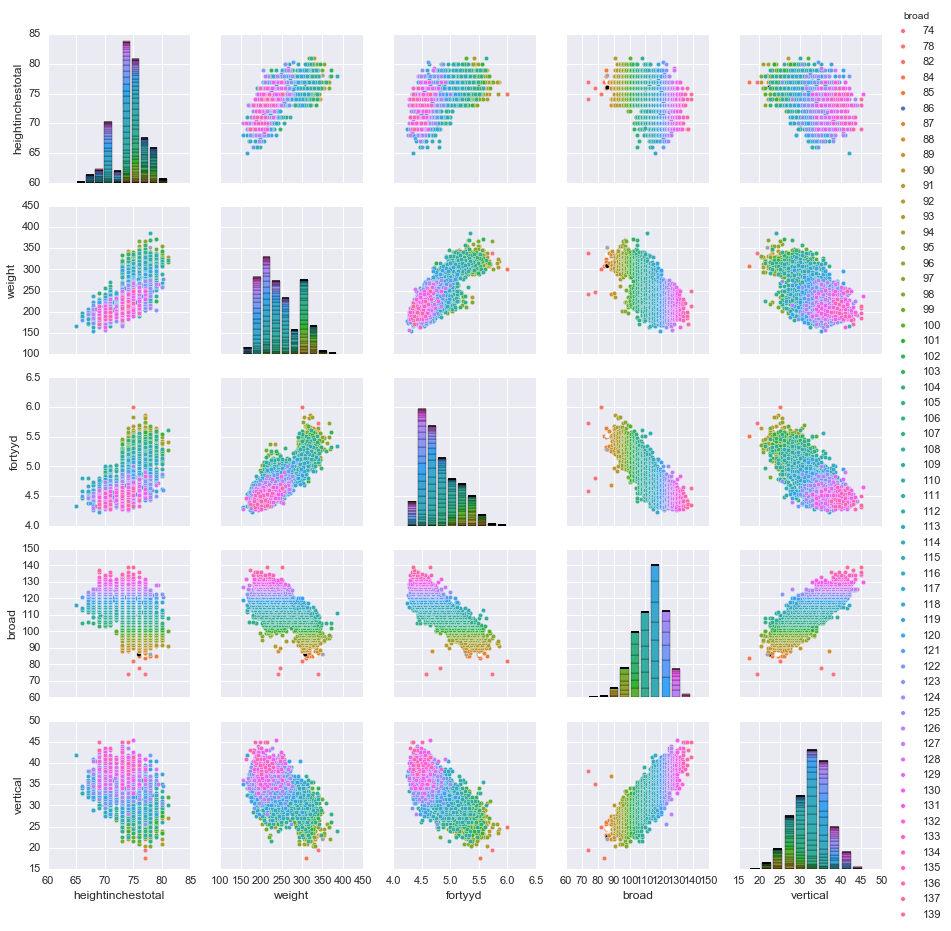

In [4]:
filtered_df = master_dataframe.loc[(master_dataframe["fortyyd"] > 0) & (master_dataframe["broad"] > 0)
                                   & (master_dataframe["twentyss"] > 0) & (master_dataframe["vertical"] > 0)]
                                      
# increase font size by 10%
sns.set(font_scale=1.1)
sns.pairplot(filtered_df, hue = "broad", vars = ["heightinchestotal", "weight", "fortyyd", "broad", "vertical"])

In [5]:
# between-features correlation matrix
print("Correlation Matrix: ")
filtered_df[["heightinchestotal", "weight", "fortyyd", "broad", "vertical"]].corr()

Correlation Matrix: 


,heightinchestotal,weight,fortyyd,broad,vertical
heightinchestotal,1.000000,0.710933,0.604715,-0.446975,-0.435743
weight,0.710933,1.000000,0.862539,-0.717353,-0.648022
fortyyd,0.604715,0.862539,1.000000,-0.825741,-0.757427
broad,-0.446975,-0.717353,-0.825741,1.000000,0.815497
vertical,-0.435743,-0.648022,-0.757427,0.815497,1.000000


The pairplot and correlation matrix above show the relationships among the selected features. There's the expected high correlation between height and weight (.71), and there's also a significant correlation between the vertical and broad jumps (.73). Further, the 40-yard dash has a high positive correlation with weight (.86) and a high negative correlation with the broad jump (-.83). As we go along, we will address this multicollinearity in order to maximize the success of our predictive model.


### Position Groups

Next, I segregated the position groups in various ways (see below). These are the groupings that I will use throughout this project.

(Note that the running backs (RB) group includes both RB and FB positions; offensive line (OL) includes all positions along the offensive line as does the defensive line (DL); safety (S) includes both safety positions (FS, SS); LINE encompasses both of the OL and DL groups.)

In [6]:
# position groups
CB = ["CB"]
S = ["FS", "SS"]
DB = CB + S
DL = ["DT", "DE", "NT"]
OLB = ["OLB"]
ILB = ["ILB"]
LB = OLB + ILB 
OL = ["C", "OC", "OG", "OT"]
RB = ["RB", "FB"]
WR = ["WR"]
QB = ["QB"]
TE = ["TE"]
K = ["K", "P"]
LINE = DL + OL



### Drafted vs. Not Drafted
Now, before we continue, let's create a "drafted" column.  If a player was drafted the "picktotal" column indicates which overall pick he was for a given year. We will use this information to create a binary feature which indicates whether a player was drafted or not.  (Note: this dataset was missing all draft data for the year 2015 so "drafted" is only inclusive of 1999-2014). 

In [75]:
# create a new "drafted" column with a 1 or 0 indicating whether the athlete was drafted or not, repectively
master_dataframe['drafted'] = (master_dataframe['picktotal'] > 0).map( {False: 0, True: 1} ).astype(int)

drafted = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["drafted"] == 1), "drafted"].size
undrafted = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["drafted"] == 0), "drafted"].size
percent_drafted = drafted/(drafted + undrafted)

print "Number of Combine participants drafted: ", drafted
print "Number of Combine participants undrafted: ", undrafted
print "Percentage of Combine participants drafted (1999-2014): {:.2f}%".format(percent_drafted * 100)


Number of Combine participants drafted:  3044
Number of Combine participants undrafted:  1581
Percentage of Combine participants drafted (1999-2014): 65.82%


Above, it can be seen that just under 66% of Combine participants ended up getting selected on draft day. That means that nearly 35% went undrafted. This 35% is surprising as, remember, each participant is invited to participate in the Combine based on the committee's expectation that he will get drafted. Later, we will focus on our ability to predict those who will not get drafted. 

Let's now look at the various position groups and compare what proportion of each group gets drafted versus not drafted.

,Drafted,Not Drafted,% Not Drafted
RB,295,226,43.378
QB,169,120,41.522
TE,170,102,37.500
OL,522,299,36.419
ILB,135,77,36.321
S,246,127,34.048
WR,397,190,32.368
DL,520,225,30.201
OLB,246,91,27.003
CB,342,116,25.328


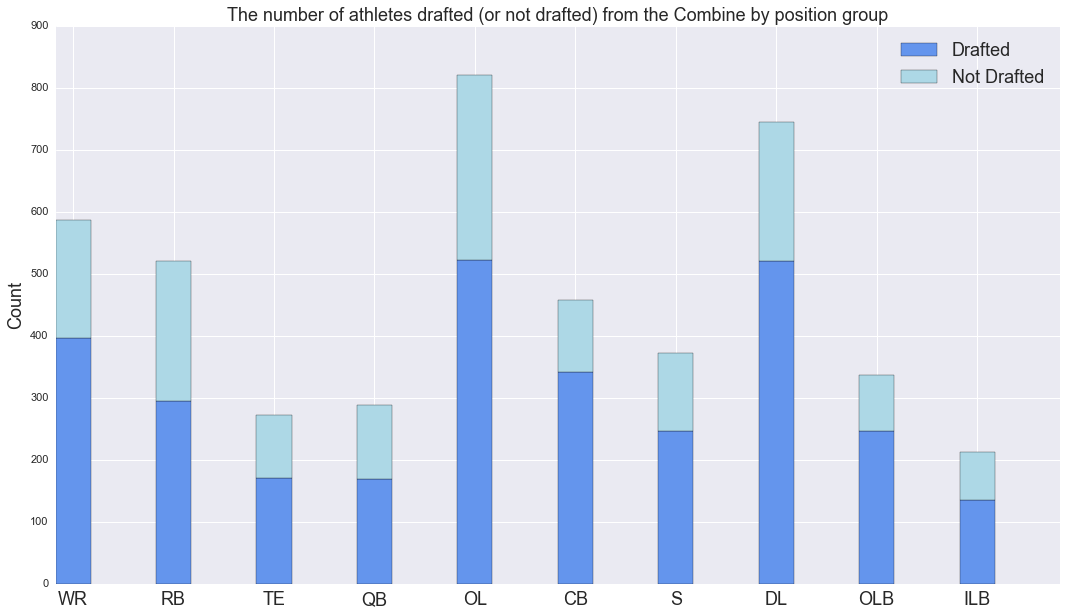

In [8]:

position_groups = [WR, RB, TE, QB, OL, CB, S, DL, OLB, ILB]
position_as_a_str = ['WR', 'RB', 'TE', 'QB', 'OL', 'CB', 'S', 'DL', 'OLB', 'ILB']
N = len(position_groups)

drafted = []
not_drafted = []

# 2015 not included as the "drafted" data is missing
for position in position_groups:
    drafted.append(master_dataframe.loc[(master_dataframe["year"] != 2015) & (master_dataframe["position"].isin(position)) & (master_dataframe["drafted"] == 1)]["drafted"].size)
for position in position_groups:
    not_drafted.append(master_dataframe.loc[(master_dataframe["year"] != 2015) & (master_dataframe["position"].isin(position)) & (master_dataframe["drafted"] == 0)]["drafted"].size)

# get the percentage of players who go undrafted
percent_not_drafted = []
for not_drftd, drftd in zip(not_drafted, drafted):
    percent_not_drafted.append(float(not_drftd)/(drftd+not_drftd))
    
average_not_drafted = float(sum(not_drafted))/ (sum(drafted) + sum(not_drafted))
    
fig, ax = plt.subplots(figsize=(18, 10))

index = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars

p1 = ax.bar(index, drafted, width, color='cornflowerblue')
p2 = ax.bar(index, not_drafted, width, color='lightblue', bottom=drafted)

ax.set_ylabel('Count', fontsize=18)
ax.set_title('The number of athletes drafted (or not drafted) from the Combine by position group', fontsize=18)
plt.xticks(index + width/2., position_as_a_str, fontsize=18)
plt.legend((p1[0], p2[0]), ('Drafted', 'Not Drafted'), fontsize=18)


def pretty_percentage(items):
    return map(lambda v: (round(v * 100, 3)), items)

df = pd.DataFrame({'Drafted': drafted , 'Not Drafted': not_drafted, '% Not Drafted': pretty_percentage(percent_not_drafted)}, index=['WR', 'RB', 'TE', 'QB', 'OL', 'CB', 'S', 'DL', 'OLB', 'ILB'])

df.loc[:, ["Drafted", 'Not Drafted', '% Not Drafted']].sort_values(by='% Not Drafted', ascending=False)

The above chart shows the split, by position group, between the proportion of players that are drafted versus not. The numbers reflect the league's emphasis on defense and the passing game. Five of the top six drafted percentages are for defensive positions with cornerback (CB) garnering the highest draft percentage at 75%. The top offensive group is the reciever (WR) group in fourth place with a 68% drafted percentage. Further, the numbers reflect the declining value of the runnng back (RB) in the NFL with a shocking 57% drafted percentage. In other words, 43.37% of all running backs who've attended the Scouting Combine since 1999 have gone undrafted.

### 40-yard Dash

Next, let's look at what many consider to be the main event at the Combines - the 40-yard dash.

![40-yard Dash](images/GettyImages-40-yd.jpg)

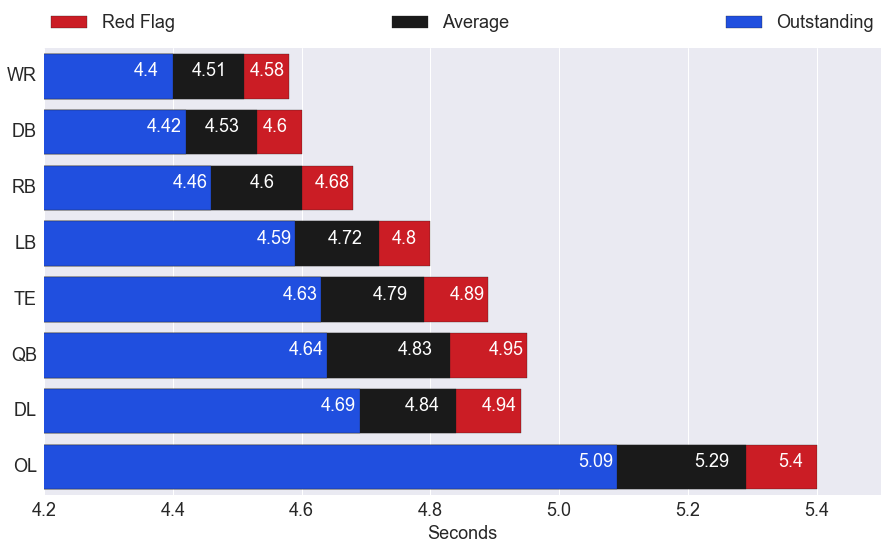

In [9]:
from drill_plots import make_drill_barplot, set_tick_labels    
make_drill_barplot(master_dataframe.loc[master_dataframe["fortyyd"] >= 1,], 'fortyyd')

In the above bar plot, you can see the range of performances by position. The blue area indicates that a performance in this range is outstanding, falling at or better than the 85th percentile of all performances since 1999. The black area is the expected (average) range, and performances exceeding this range are "red flags", falling at or below the 25th percentile. Note the differences in expected performance and the range of expected performance by position.

Next, let's compare 40-yard dash performance to who gets drafted. Let's look at the top 10% and bottom 10% (within position group) of 40-yard dash performances to see the relationship speed has with draft outcome.

In [10]:
from drill_percentiles import get_position_by_drill_lt_percentile_and_drafted, get_position_by_drill_gt_percentile_and_drafted 

print("Proportion of players drafted by position within the 90th percentile (top 10%) of 40-yard dash performances: ")                       
percent_drafted_at_90th_percentile = get_position_by_drill_lt_percentile_and_drafted(master_dataframe, 'fortyyd', .1)

print("\nProportion of players drafted by position within the 10th percentile (bottom 10%) of 40-yard dash performances: ") 
percent_drafted_at_10th_percentile = get_position_by_drill_gt_percentile_and_drafted(master_dataframe, 'fortyyd', .9)

Proportion of players drafted by position within the 90th percentile (top 10%) of 40-yard dash performances: 
43 / 48 CB
35 / 40 S
79 / 87 DB
41 / 46 DL
32 / 37 OLB
20 / 21 ILB
51 / 56 LB
65 / 86 OL
41 / 54 RB
59 / 63 WR
23 / 29 QB
23 / 27 TE
102 / 121 LINE

Proportion of players drafted by position within the 10th percentile (bottom 10%) of 40-yard dash performances: 
18 / 50 CB
11 / 38 S
28 / 87 DB
22 / 43 DL
14 / 33 OLB
5 / 23 ILB
20 / 59 LB
30 / 86 OL
23 / 55 RB
23 / 60 WR
14 / 30 QB
9 / 30 TE
45 / 119 LINE



Above shows the proportion of players in the top 10% and bottom 10% (by position) in the 40-yard dash who were subsequently drafted. There are distict differences among the groups. One observation that stands out here is that 21 out of 86 (24.4%) offensive linemen (OL) in the 90th percentile weren't drafted (the largest percentage of any group), whereas only 4 out of 63 (6.3%) wide receivers (WR) and 1 out of 21 (4.7%) inside linebackers in the 90th percentile weren't drafted. Moreover, over half (51.16%) of the defensive linemen (DL) in the bottom 10% of 40-yard dash performances were still drafted. 

Following is an ordered look at the percentage of athletes within a given position group that were drafted, having 40-yard dash performances falling in the top 10% or bottom 10% of their group:

90th percentile:
[('ILB', 95.238), ('WR', 93.651), ('LB', 91.071), ('DB', 90.805), ('CB', 89.583), ('DL', 89.13), ('S', 87.5), ('OLB', 86.486), ('TE', 85.185), ('LINE', 84.298), ('QB', 79.31), ('RB', 75.926), ('OL', 75.581)]

10th percentile:
[('DL', 51.163), ('QB', 46.667), ('OLB', 42.424), ('RB', 41.818), ('WR', 38.333), ('LINE', 37.815), ('CB', 36.0), ('OL', 34.884), ('LB', 33.898), ('DB', 32.184), ('TE', 30.0), ('S', 28.947), ('ILB', 21.739)]

![40-yard Dash](images/joeybosa_40.jpg)

Let's compare the drop off among position groups between the percent that are drafted when possessing top 40-yard dash performances versus bottom performances.

In [84]:
print("Percentage point difference between percent drafted in the top versus bottom 10% of the 40-yard dash: \n")
top_10_percentile = [('ILB', 95.238), ('WR', 93.651), ('LB', 91.071), ('DB', 90.805), ('CB', 89.583), ('DL', 89.13), ('S', 87.5), ('OLB', 86.486), ('TE', 85.185), ('LINE', 84.298), ('QB', 79.31), ('RB', 75.926), ('OL', 75.581)]
bottom_10_percentile = [('DL', 51.163), ('QB', 46.667), ('OLB', 42.424), ('RB', 41.818), ('WR', 38.333), ('LINE', 37.815), ('CB', 36.0), ('OL', 34.884), ('LB', 33.898), ('DB', 32.184), ('TE', 30.0), ('S', 28.947), ('ILB', 21.739)]
percent_drop = []
for i in top_10_percentile:
    for j in bottom_10_percentile:
        if i[0] == j[0]:
            percent_drop.append((i[0], format((i[1] - j[1]), '0.2f')))
           
# sort the list of tuples
percent_drop.sort(key=lambda x: x[1], reverse=True)
print percent_drop 

Percentage point difference between percent drafted in the top versus bottom 10% of the 40-yard dash: 

[('ILB', '73.50'), ('DB', '58.62'), ('S', '58.55'), ('LB', '57.17'), ('WR', '55.32'), ('TE', '55.19'), ('CB', '53.58'), ('LINE', '46.48'), ('OLB', '44.06'), ('OL', '40.70'), ('DL', '37.97'), ('RB', '34.11'), ('QB', '32.64')]


Most of these guys are plenty fast but, when evaluating draft prospects, the speed metric is emphasized more or less by position. For example, 75.92% of RB in the 90th percentile were drafted. However, a surprising 41.81% of running backs in the bottom 10% (or 10th percentile) of 40-yard dash performances were still chosen on draft day.  That's only a drop of 34 percentage points between the top 10% of performances versus the bottom 10% in terms of what percentage was drafted. This was the smallest drop within a positon group other than quarterbacks (79.31%/46.67%), who only dropped 32.6 percentage points between the top and bottom performers within their position on the speed drill. Clearly, there are many factors that take priority over speed in terms of selecting an NFL quarterback, but in evaluating an NFL running back, speed also appears to be less of a determining factor. In contrast, inside linebackers (ILB) have a stunning drop of 73.5 percentage points (95.23/21.73) between the top and the bottom 10% of within-group 40-yard dash performances in terms of being drafted.  

Although everyone looks forward to watching the 40-yard dash - it's the premier event at the Scouting Combine - in terms of being drafted, it certainly isn't a clear indicator for linemen, quarterbacks, nor running backs. Speed matters, but for some positions, not as much as we like to think. 

Below is a density plot of the 40-yard dash for groups of offensive players and defensive players, providing a visualization of the varied distributions. Note how the defensive position groups are much more tightly distributed, between and withing groups, compared to the offensive position groups.

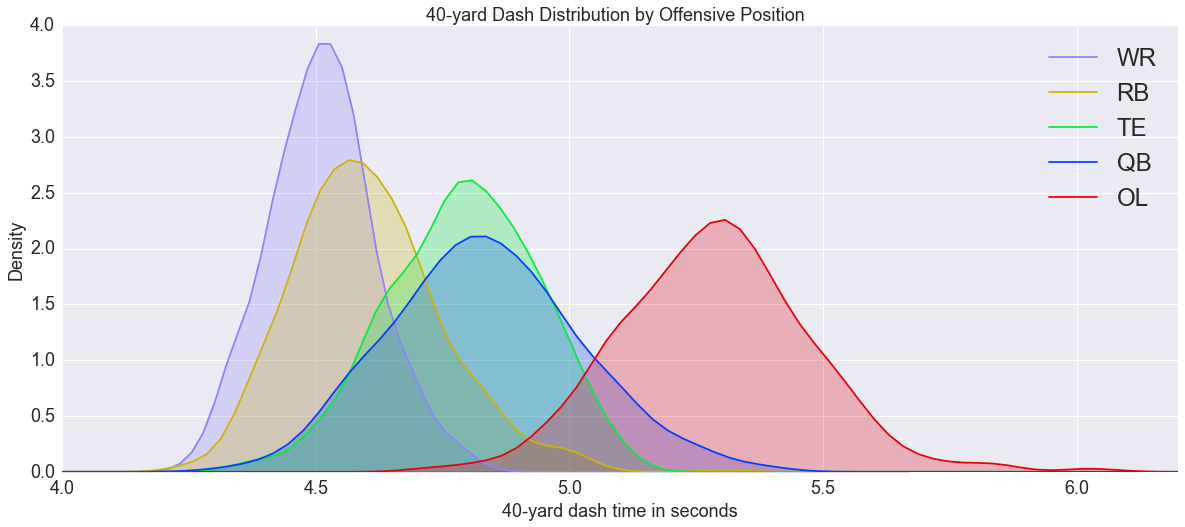

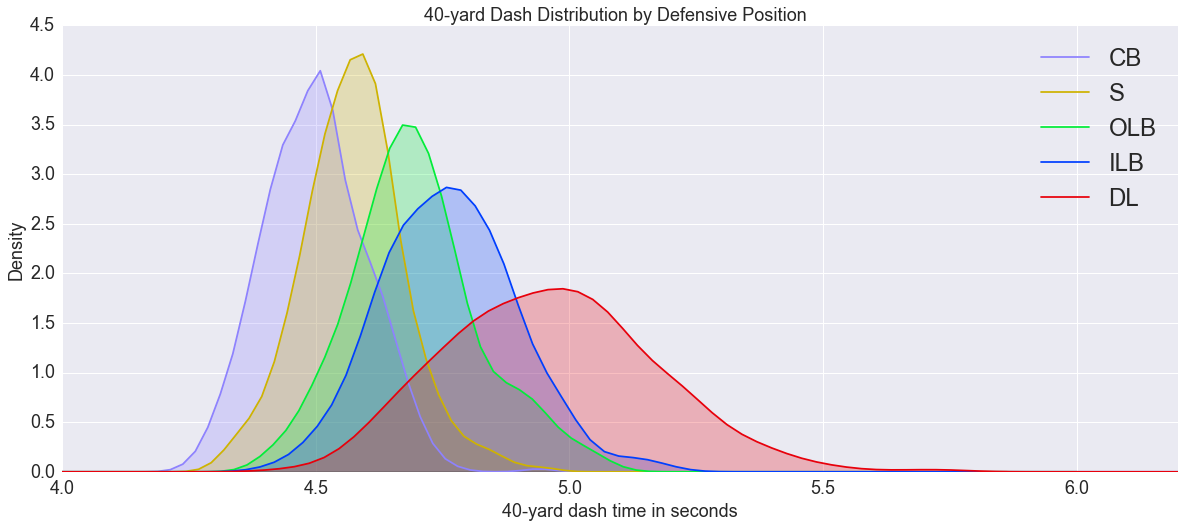

In [12]:
OL_40 = master_dataframe.loc[(master_dataframe["position"].isin(OL)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
QB_40 = master_dataframe.loc[(master_dataframe["position"].isin(QB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
TE_40 = master_dataframe.loc[(master_dataframe["position"].isin(TE)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
RB_40 = master_dataframe.loc[(master_dataframe["position"].isin(RB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
WR_40 = master_dataframe.loc[(master_dataframe["position"].isin(WR)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]

fig, ax = plt.subplots(figsize=(20,8))

ax = sns.kdeplot(WR_40, shade=True, color=sns.xkcd_rgb["periwinkle"], label="WR")
ax = sns.kdeplot(RB_40, shade=True, color=sns.xkcd_rgb["mustard"], label="RB")
ax = sns.kdeplot(TE_40, shade=True, color="g", label="TE")
ax = sns.kdeplot(QB_40, shade=True, color="b", label="QB")
ax = sns.kdeplot(OL_40, shade=True, color="r", label="OL")

ax.set_title('40-yard Dash Distribution by Offensive Position  ', fontsize = 18)
ax.set_ylabel('Density', fontsize = 18)
ax.set_xlabel('40-yard dash time in seconds', fontsize = 18)
ax.set_xlim((4.0, 6.2))
plt.legend(fontsize=24)
set_tick_labels(ax)


DL_40 = master_dataframe.loc[(master_dataframe["position"].isin(DL)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
ILB_40 = master_dataframe.loc[(master_dataframe["position"].isin(ILB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
OLB_40 = master_dataframe.loc[(master_dataframe["position"].isin(OLB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
S_40 = master_dataframe.loc[(master_dataframe["position"].isin(S)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]
CB_40 = master_dataframe.loc[(master_dataframe["position"].isin(CB)) & (master_dataframe['fortyyd'] >= 1)]["fortyyd"]

fig, ax2 = plt.subplots(figsize=(20,8))

ax2 = sns.kdeplot(CB_40, shade=True, color=sns.xkcd_rgb["periwinkle"], label="CB")
ax2 = sns.kdeplot(S_40, shade=True, color=sns.xkcd_rgb["mustard"], label="S")
ax2 = sns.kdeplot(OLB_40, shade=True, color="g", label="OLB")
ax2 = sns.kdeplot(ILB_40, shade=True, color="b", label="ILB")
ax2 = sns.kdeplot(DL_40, shade=True, color="r", label="DL")

ax2.set_title('40-yard Dash Distribution by Defensive Position  ', fontsize = 18)
ax2.set_ylabel('Density', fontsize = 18)
ax2.set_xlabel('40-yard dash time in seconds', fontsize = 18)
ax2.set_xlim((4.0, 6.2))
plt.legend(fontsize=24)
set_tick_labels(ax2)

### Body Mass Index (BMI)

With weight and height being so highly correlated I wanted to combine the two features in some way. Moreover, because different athletes can weigh the same yet have a very different body composition I thought it might be useful to come up with some measure of "fatness". With this in mind, I decided to combine height and weight by calculating body mass index ("bmi") as a new feature. This constituted converting weight from pounds to kilograms ("wt_kg"), and converting height in inches to meters ("ht_m"). I then divided "wt_kg" by "ht_m" squared to create the new "bmi" column, which combines height and weight in a single feature and also provides some indication of "fatness".  


![40-yard Dash](images/danny-shelton-combine.jpg)



Below are BMI box plots for defensive position groups and offensive position groups. 

In [13]:
# create a new "wt_kg" column displaying weight in kgs
master_dataframe["wt_kg"] = master_dataframe["weight"] * .453592

# create a new "ht_m" column displaying height in meters
master_dataframe["ht_m"] = master_dataframe["heightinchestotal"] * .0254

# create bmi to account for body composition or fatness relative to weight
master_dataframe["bmi"] = master_dataframe["wt_kg"]/(master_dataframe["ht_m"]**2)

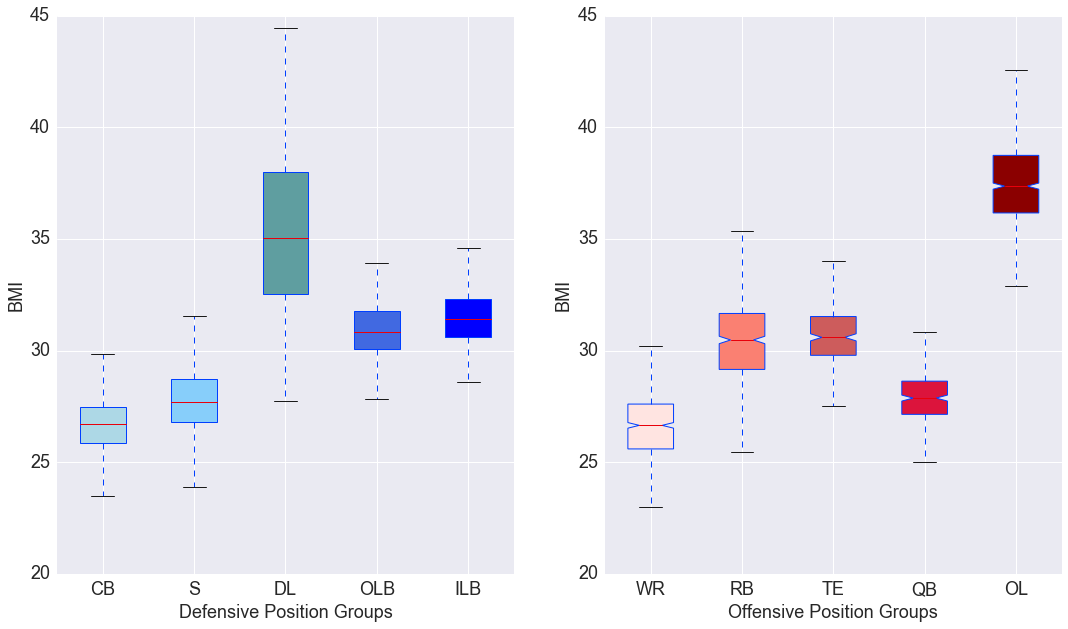

In [14]:
# CB, S, DL, OLB, ILB
corner_backs = master_dataframe.loc[(master_dataframe['position'].isin(CB))]["bmi"]
safeties = master_dataframe.loc[(master_dataframe['position'].isin(S))]["bmi"]
d_linemen = master_dataframe.loc[(master_dataframe['position'].isin(DL))]["bmi"]
out_linebackers = master_dataframe.loc[(master_dataframe['position'].isin(OLB))]["bmi"]
in_linebackers = master_dataframe.loc[(master_dataframe['position'].isin(ILB))]["bmi"]

# WR, RB, TE, QB, OL
receivers = master_dataframe.loc[(master_dataframe['position'].isin(WR))]["bmi"]
running_backs = master_dataframe.loc[(master_dataframe['position'].isin(RB))]["bmi"]
tight_ends = master_dataframe.loc[(master_dataframe['position'].isin(TE))]["bmi"]
quarterbacks = master_dataframe.loc[(master_dataframe['position'].isin(QB))]["bmi"]
o_linemen = master_dataframe.loc[(master_dataframe['position'].isin(OL))]["bmi"]

defensive_groups = np.array([corner_backs, safeties, d_linemen, out_linebackers, in_linebackers])
offensive_groups =  np.array([receivers, running_backs, tight_ends, quarterbacks, o_linemen])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
# rectangular box plot
bplot_d = axes[0].boxplot(defensive_groups, vert=True, patch_artist=True)   # fill with color
bplot_o = axes[1].boxplot(offensive_groups, notch=True, patch_artist=True)   # fill with color

# fill with colors - Defense
colors_d = ['lightblue', 'lightskyblue', "cadetblue", "royalblue", 'blue']
for patch, color in zip(bplot_d['boxes'], colors_d):
    patch.set_facecolor(color)
# fill with colors - Offense
colors_o = ['mistyrose', "salmon", "indianred", "crimson", 'darkred']
for patch, color in zip(bplot_o['boxes'], colors_o):
    patch.set_facecolor(color)
        
# adding axes labels
axes[0].yaxis.grid(True)
axes[0].set_xticks([y+1 for y in range(len(defensive_groups))])
axes[0].set_xlabel('Defensive Position Groups', fontsize=18)
axes[0].set_ylabel('BMI', fontsize=18)

axes[1].yaxis.grid(True)
axes[1].set_xticks([y+1 for y in range(len(offensive_groups))])
axes[1].set_xlabel('Offensive Position Groups', fontsize=18)
axes[1].set_ylabel('BMI', fontsize=18)
        
set_tick_labels(axes[0])
set_tick_labels(axes[1])

# add x-tick labels
plt.setp(axes[0], xticks=[y+1 for y in range(len(defensive_groups))],xticklabels=['CB', 'S', 'DL', 'OLB', 'ILB'])
plt.setp(axes[1], xticks=[y+1 for y in range(len(defensive_groups))],xticklabels=['WR', 'RB', 'TE', 'QB', 'OL'])




Note: The national BMI standards should not be applied to this population as BMI calculations are typically inaccurate for very muscular people (e.g., nearly every athlete in this dataset surpassed a BMI of 25 which is considered overweight).

From the chart above it can be seen that cornerbacks (CB) and receivers (WR) have very similar bodies, safeties (S) and quarterbacks (QB) are similarly built, and both linebacker groups (ILB, OLB) are similar to the running back (RB) and tight end (TE) groups. However, it's clear that the linemen's bodies are starkly different from all other groups. Moreover, the offensive line is even different from the defensive line in some respects with a higher average BMI and a much narrower range. The defensive line has the largest spread for BMI among all of the groups.

![NFL Scouting Combine - Lineman](images/nfl-combine-football.jpg)



## Prediction

The goal of this project, in addition to exploring the data, is to predict which athletes will and, importantly, which athletes **won't** get drafted based on their performance at the NFL Scouting Combine. This is a binary classification problem. The preceding charts collectively make it clear that the LINE position groups (OL, DL) are vastly different from all other groups in terms of performance qualities and physique. Because of this, in this preliminary project, **I will focus on just the LINE group**. By looking at certain groups in isolation, so that their discriminative features can more readily be learned, a predictive model will probably be more accurate. 

For prediction, I will employ **Logistic Regression** as the primary model along with a linear **Support Vector Machine**. Initially, the following features will be used: "heightinchestotal", "weight", "bmi", "twentyss", "fortyyd", "bench", "broad", "vertical". I chose these features as a baseline as they address body size, speed, strength and explosiveness. But, also, I tried to balance using performances that reflected key abilities, with maximizing the number of available samples since some of the drills and measurements had limited participation.

There were a total of 984 samples in this "linemen" datatset with 30 percent reserved for testing (688 samples were used for training and 296 were used for testing only). 

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score 
# 2015 was dropped as presently the "drafted" results are missing
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
# select performances that are greated than 0 (missing value)
df_linemen = df_linemen.loc[(df_linemen["heightinchestotal"] >= 1) & (df_linemen["weight"] >= 1) & (df_linemen["broad"] >= 1) & (df_linemen["fortyyd"] >= 1) & (df_linemen["vertical"] >= 1) & (df_linemen["bench"] >= 1) & (df_linemen["twentyss"] >=1)]

X = df_linemen[["heightinchestotal", "weight", "bmi", "twentyss", "fortyyd", "bench", "broad", "vertical"]].values

y = df_linemen["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
N = y_test.size

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))


svm = SVC(kernel = 'linear', C = 1000.0, random_state = 0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))


LOGISTIC REGRESSION
Misclassified 89 out of 296
Accuracy: 0.70
training set score: 0.725291
test set score: 0.699324

SUPPORT VECTOR MACHINE
Misclassified 94 out of 296
Accuracy: 0.68
training set score: 0.731105
test set score: 0.682432


The predictive accuracy of both the Logistic Regression and SVM models is only moderate. Logistic Regression achieved 72% accuracy on the training set and 70% accuracy on the test set.  Similarly, SVM scored 73% accuracy on the training set and 68% on the test set (typically, a given model will perform a little less accurately on the unseen test set than the training set, as is the case here). Remember, nearly 66% of all participants get drafted so if I just guessed that everyone gets drafted I would appear to be about 66% accurate (even though I would be 0% accurate on who won't get drafted). Also, keep in mind that a primary interest in this project is the ability to predict who **won't** get drafted. A little later I will look much closer at accuracy and break down the differences in accuracy between predicting who will get drafted versus predicting who won't.

In order to improve the accuracy of the preceding models I looked at different combinations of the various features. I then decided to simplify the model by dropping the "heightinchestotal" and "weight" features, as "bmi" was a combination of the two. I also dropped "vertical" as it was highly correlated with "broad" and it seems that a horizontal broad jump might be more reflective of a lineman's explosive abilities and requirements than a vertical movement. Further, as I alluded to previously, because the number of samples in the selected dataset is the intersection among the various chosen features that have non-null values, I decided to not include features that have relatively high null values. For example, by dropping the features "bench" and "twentyss", the number of valid samples for the LINE increased from 984 to 1273. So, the remaining features to be trained are "bmi", "fortyyd", and "broad".

(Note: For each model I used a random_state seed for the pseudo random number generator so that the split/shuffles would remain the same for each training/test trial).

I then retrained the models.

In [16]:
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["broad"] >= 1)]

X = df_linemen[["bmi", "fortyyd", "broad"]].values

y = df_linemen["drafted"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
N = y_test.size

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)


print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))



svm = SVC(kernel = 'linear', C = 1000.0, random_state = 0)  # linear model
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))

LOGISTIC REGRESSION
Misclassified 104 out of 382
Accuracy: 0.73
training set score: 0.680135
test set score: 0.727749

SUPPORT VECTOR MACHINE
Misclassified 115 out of 382
Accuracy: 0.70
training set score: 0.663300
test set score: 0.698953


Above, you can see that the test set prediction from the simpler model improved slightly. Logistic Regression scored an accuracy of 73% (.727) on the test data and SVM scored 70% (.698) on the test data. However, it appears that we now might be underfitting as, in this instance, the test set score surpasses the training set score. Although this model is much simpler it perhaps isn't capturing key regularities within the data. To address this I will add a little more complexity to the model. 


## Feature Binning

One way to make linear models more powerful is to use binning to expand a continuous feature into multiple features. This is also known as discretization of the feature. Below, I binned the "fortyyd" and "broad" features and added an interaction.  


In [17]:
# DISCRETIZATION
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["broad"] >= 1)]

# get the min and max values for selected drill
fortyyd_min = df_linemen["fortyyd"].min()
fortyyd_max = df_linemen["fortyyd"].max()
broad_min = df_linemen["broad"].min()
broad_max = df_linemen["broad"].max()

# creates N number of bins between the min and max values
fortyyd_bins = np.linspace(fortyyd_min,fortyyd_max,11)
broad_bins = np.linspace(broad_min,broad_max,11)

# reshape feature column to be 2D
fortyyd =  df_linemen["fortyyd"].reshape(-1,1)
broad =  df_linemen["broad"].reshape(-1,1)

# assign each "fortyyd" time to a specific bin, creating a new "binned" column
fortyyd_binned = np.digitize(fortyyd, bins=fortyyd_bins)
# assign each "broad" value to a specific bin, creating a new "binned" column
broad_binned = np.digitize(broad, bins=broad_bins)


# interaction between the fortyyd bin value and the actual fortyyd time
fortyyd_x_fortyyd_binned = df_linemen["fortyyd"].reshape(-1,1) * (fortyyd_binned)

# interaction between the broad bin value and the actual broad jump distance
broad_x_broad_binned = df_linemen["broad"].reshape(-1,1) * (broad_binned)


# apply one hot encoding to the fortyyd_binned column creating a (nrows x nbins) feature matrix
encoder = OneHotEncoder(sparse=False)
encoder.fit(fortyyd_binned)
fortyyd_one_hot_coded = encoder.transform(fortyyd_binned)

# apply one hot encoding to the broad_binned column creating a (nrows x nbins) feature matrix
encoder2 = OneHotEncoder(sparse=False)
encoder2.fit(broad_binned)
broad_one_hot_coded = encoder.transform(broad_binned)

print "Sample fortyyd times: \n", df_linemen["fortyyd"][:5]
print "\nCreated fortyyd bins: \n", fortyyd_bins
print "\nSample fortyyd times assigned to a bin: \n", fortyyd_binned[:5]
print "\nSample fortyyd * fortyyd_binned: \n", fortyyd_x_fortyyd_binned[:5]
print "\nBinned fortyyd times one-hot-encoded: \n", fortyyd_one_hot_coded[:5]

# concatenate "bmi" with the feature matrices
X = np.hstack((df_linemen["bmi"].reshape(-1,1), fortyyd_one_hot_coded))
X = np.hstack((X, fortyyd_x_fortyyd_binned))
X = np.hstack((X, broad_one_hot_coded))
X = np.hstack((X, broad_x_broad_binned))


print "\nShape of new combined feature matrix (bmi, fortyyd and broad): ", X.shape


Sample fortyyd times: 
341    4.97
345    5.30
355    5.19
356    5.06
370    5.47
Name: fortyyd, dtype: float64

Created fortyyd bins: 
[ 4.43   4.587  4.744  4.901  5.058  5.215  5.372  5.529  5.686  5.843  6.   ]

Sample fortyyd times assigned to a bin: 
[[4]
 [6]
 [5]
 [5]
 [7]]

Sample fortyyd * fortyyd_binned: 
[[ 19.88]
 [ 31.8 ]
 [ 25.95]
 [ 25.3 ]
 [ 38.29]]

Binned fortyyd times one-hot-encoded: 
[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]

Shape of new combined feature matrix (bmi, fortyyd and broad):  (1273, 25)


I will briefly walk through the above code (although the comments should be helpful). I first retrieved the min and max values for the "fortyyd" and "broad" drills for the linemen. I then created 11 equally spaced bins for the two features (above I've printed out 5 sample forty yard times and the bins that were created from the forty yard min and max values). 

Next, np.digitize() assigns each fortyyd/broad value to an appropriate bin (bins fall between adjacent numbers), creating a new "binned" column (a sample is printed above). 

I then created an interaction feature which reflects the product of the assigned bin and the specific fortyyd/broad value for each individual. This feature reflects or emphasizes the bin and the original feature (a fortyyd sample is printed above). 

Next, the "binned" features are one-hot-encoded to create multiple features (11 in total). A sample of the one-hot-endoded fortyyd_binned is shown above.

I then concatenated the "bmi" feature (1 column) with the "fortyyd" one-hot-encoded (11 columns) and interaction (1 column) features. I then, similarly, concatenated the "broad" features. In sum, this created a 1273x25 feature matrix.

The models were then retrained using this new feature matrix. With the increased complexity, number of features, and concern over multicollinearity, I applied L2 (Ridge) regularization, which imposes a penalty on the size of the coefficients, and thus the coefficients can become more robust to collinearity.

The C parameter in both (SVC and LogisticRegression) models is the complexity parameter that controls the amount of regularization. The value is the inverse of regularization strength, so smaller values specify stronger regularization, and a greater amount of shrinkage. 

In [18]:

y = df_linemen["drafted"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
N = y_test.size

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C = 10, random_state = 0)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)


print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))



svm = SVC(kernel='linear', C = .01, random_state = 0)  # linear model
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))


LOGISTIC REGRESSION
Misclassified 106 out of 382
Accuracy: 0.72
training set score: 0.699214
test set score: 0.722513

SUPPORT VECTOR MACHINE
Misclassified 107 out of 382
Accuracy: 0.72
training set score: 0.691358
test set score: 0.719895



Above, is the best achievable result for each model after manipulating regularization.  

Initially, without any regularization (C = 1000), Logistic Regression achieved test set accuracy of .714, missing 109 out of the 382 samples; SVM achieved an accuracy of .698, missing 115. 

Logistic Regression achieved its best test set accuracy of .722 (missing 106) with moderate regularization (C=10). SVM, however, performed best (.719, missing 107) with much more regularization (C=.01). Logistic Regression didn't improve its predictive accuracy from before, but SVM's accuracy did improve, from approximately 70% to 72%.


## Feature Interaction

Another way to enrich a feature representation, in particular for linear models, is adding interaction with polynomial features of the original features.

I used the same 3 features as above but used sklearn's PolynomialFeature module with degree=2 to create polynomial features as follows: [1, bmi, fortyyd, broad, bmi^2, bmi \* fortyyd, bmi \* broad, fortyyd^2, fortyyd \* broad, broad^2]. We now have a matrix with 10 features.

In [19]:
# INTERACTIONS
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["broad"] >= 1)]

X = df_linemen[["bmi", "fortyyd", "broad"]].values
y = df_linemen["drafted"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
N = y_test.size

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_std)
X_train_poly = poly.transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

lr = LogisticRegression(C = 1000, random_state = 0)
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

print ("LOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % lr.score(X_train_poly, y_train))
print("test set score: %f" % lr.score(X_test_poly, y_test))


svm = SVC(kernel = 'linear', C = 1000, random_state = 0)  # linear model
svm.fit(X_train_poly, y_train)
y_pred = svm.predict(X_test_poly)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % svm.score(X_train_poly, y_train))
print("test set score: %f" % svm.score(X_test_poly, y_test))


LOGISTIC REGRESSION
Misclassified 107 out of 382
Accuracy: 0.72
training set score: 0.690236
test set score: 0.719895

SUPPORT VECTOR MACHINE
Misclassified 104 out of 382
Accuracy: 0.73
training set score: 0.677890
test set score: 0.727749


Above, Logistic Regression showed no improvement using polynomial features, misclassifying 107 out of the 382 test samples (.719). SVM achieved a slight improvement, now only missing on 104 (.727). Regularization had little effect on either model in this instance.


## Feature Engineering

I wanted to see if I could get more from the data so I next attempted to engineer some additional features (from the existing ones) in an effort to decrease the existing bias and perhaps better capture important patterns within the data.

I believe that a player's perceived pedigree might provide a great contribution to his draftability, in other words, where a prospect played college football, received collegiate coaching and the level of competition that he competed against. Whether conciously or not, I believe that many scouts and general managers are influenced by brand name. All things being equal, the fact that an athlete played his college ball at a "power" school would perhaps inure to the benefit of that player. In this light, I identified all of the schools within what's known as the Power Five. The Power Five conferences (ACC, Big 12, Big Ten, Pac-12, SEC) are 65 U.S. colleges which generally recruit nationally and are regarded as having the best talent and the best college football teams in the country. I thus decided to create a binary "power5" feature which reflects whether a prospect played his college ball at one of the Power Five schools. 

In [20]:

# a list of the Power Five schools from the ACC, Big 12, Big Ten, Pac-12, and SEC conferences
power5 = ["Boston College", "Clemson", "Duke", "Florida St.", "Florida State",
          "Geogia Tech", "Louisville", "Miami", "Miami (FL)", "North Carolina", 
          "North Carolina St.", "N.C. State","North Carolina State", "Pittsburgh", 
          "Syracuse", "Virginia", "Virginia Tech", "Wake Forest", "Notre Dame", 
          "Baylor", "Iowa St.", "Iowa State", "Kansas", "Kansas St.", "Kansas State", 
          "Oklahoma", "Oklahoma State", "Oklahoma St.", "TCU", "Texas", "Texas Tech", 
          "West Virginia", "Illinois", "Indiana", "Iowa", "Maryland", "Michigan", 
          "Michigan St.", "Michigan State", "Minnesota", "Nebraska", "Northwestern", 
          "Ohio State", "Ohio St.", "Penn St.", "Penn State", "Purdue", "Rutgers", 
          "Wisconsin", "Arizona", "Arizona St.", "Arizona State", "California", 
          "UCLA", "Colorado", "Oregon", "Oregon St.", "Oregon State", "USC", "Southern California",
          "Stanford", "Utah", "Washington", "Washington St.", "Washington State", 
          "Alabama", "Arkansas", "Auburn", "Florida", "Georgia", "Kentucky", "LSU", "Louisiana State"
          "Mississippi", "Ole Miss", "Mississipi St.", "Mississippi State", "Missouri", 
          "South Carolina", "Tennessee", "Texas A&M", "Texas AM", "Vanderbilt"]

# create boolean feature to show whether player comes from a Power Five conference    
master_dataframe["power5"] = master_dataframe["college"].isin(power5).astype(int)  


Next, because of the varied size of linemen in particular, a common measure that teams consider is size-to-speed ratio. To establish this feature, I first calculated body surface area ("b_s_a", as shown below). I then divided "fortyyd" by "**b_s_a**" to create the new feature "**size_speed**" as a measure of size-to-speed ratio. 

Similarly, I also engineered a relative measure for the jumps ("broad", "vertical") to consider a size-to-distance ratio. Here, I divided the sum of the jumps ("broad" + "vertical") for a given athlete by his body surface area ("b_s_a") to create the feature **"size_distance"**.

I also played with creating a relative speed (**"rel_speed"**) feature by dividing weight by fortyyd, and a **"force"** feature by multiplying the athlete's weight by the sum of his jumps distances. 



In [21]:

# body weight to distance ratio to encapsulate generated force (power)
master_dataframe["force"] = master_dataframe["wt_kg"] * (master_dataframe["vertical"] + master_dataframe["broad"])

# create weight to speed ratio
master_dataframe["rel_speed"] = master_dataframe["wt_kg"] / (master_dataframe["fortyyd"])

# calculate body surface area to use as a size measure
master_dataframe["b_s_a"] = np.sqrt( ( (master_dataframe["ht_m"] * 100 ) * master_dataframe["wt_kg"] ) / 3600 )

# create size/speed ratio to encapsulate relative speed
master_dataframe["size_speed"] = master_dataframe["fortyyd"] / master_dataframe["b_s_a"] 

# create size/distance ratio to encapsulate power
master_dataframe["size_distance"] = (master_dataframe["vertical"] + master_dataframe["broad"]) / master_dataframe["b_s_a"]


An additional change I decided to make was to replace the "broad" jump feature with the "vertical" jump feature. As I mentioned previously, the two features are highly correlated (.815) but since "vertical" has a smaller correlation with "fortyyd" (see Correlation Matrix) I decided to use the "vertical" feature. 


![NFL Scouting Combine - Lineman](images/combine_vert.jpg)



Below is a bar chart displaying the mean vertical jump peformances (with standard deviation) for each position group. It can be seen that drafted players tend to perform better than undrafted players on this drill. 

(The NT (nose tackle) group shows an abberation in the data. After filtering things down there were only 4 players remaining who were listed as an NT. Three of those players were drafted and 1 was not. The 1 undrafted NT was used as the undrafted mean. That's why there is no standrd deviation shown).

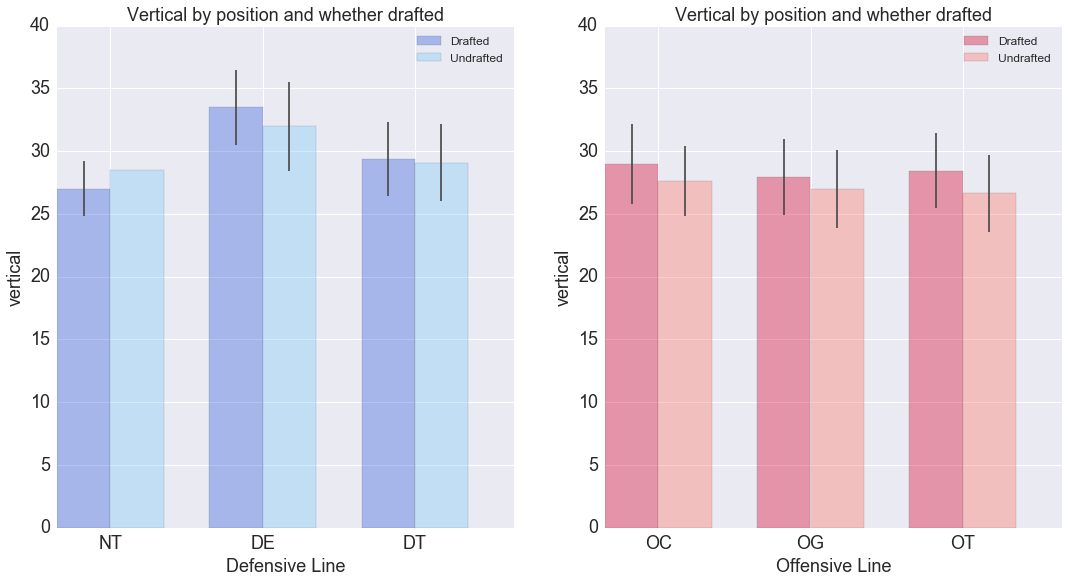

In [22]:
df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[df_linemen["vertical"]>=1]

# get the mean and std for each given position for a given drill
def drill_means_std(df, positions, drill):
    drafted_means = []
    drafted_std = []
    for p in positions:
        drafted_means.append(df.loc[(df["position"].isin([p])) & (df["drafted"] == 1), drill].mean())
        drafted_std.append(df.loc[(df["position"].isin([p])) & (df["drafted"] == 1), drill].std())
        
    undrafted_means = []
    undrafted_std = []
    for p in positions:
        undrafted_means.append(df.loc[(df["position"].isin([p])) & (df["drafted"] == 0), drill].mean())
        undrafted_std.append(df.loc[(df["position"].isin([p])) & (df["drafted"] == 0), drill].std())
    return drafted_means, drafted_std, undrafted_means, undrafted_std

D_Line = ['NT', 'DE', 'DT']
O_Line = ['OC', 'OG', 'OT']  
n_groups = len(D_Line)
drill = "vertical"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}

d_means, d_std, und_means, und_std = drill_means_std(df_linemen, D_Line, drill)

rects1 = ax[0].bar(index, d_means, bar_width,
                 alpha=opacity,
                 color='royalblue',
                 yerr=d_std,
                 error_kw=error_config,
                 label='Drafted')

rects2 = ax[0].bar(index + bar_width, und_means, bar_width,
                 alpha=opacity,
                 color='lightskyblue',
                 yerr=und_std,
                 error_kw=error_config,
                 label='Undrafted')

ax[0].set_xlabel('Defensive Line', fontsize=18)
ax[0].set_ylabel(drill, fontsize=18)
ax[0].set_title(drill.capitalize() + ' by position and whether drafted', fontsize=18)
set_tick_labels(ax[0])
plt.setp(ax[0], xticks=[i+bar_width for i in index],xticklabels=D_Line)
ax[0].legend(fontsize=12)

d_means, d_std, und_means, und_std = drill_means_std(df_linemen, O_Line, drill)

rects3 = ax[1].bar(index, d_means, bar_width,
                 alpha=opacity,
                 color='crimson',
                 yerr=d_std,
                 error_kw=error_config,
                 label='Drafted')

rects4 = ax[1].bar(index + bar_width, und_means, bar_width,
                 alpha=opacity,
                 color='salmon',
                 yerr=und_std,
                 error_kw=error_config,
                 label='Undrafted')

ax[1].set_xlabel('Offensive Line', fontsize=18)
ax[1].set_ylabel(drill, fontsize=18)
# adjust O_Line 'y' to match D-Line 'y' for visual comparison
ax[1].set_ylim(0,40)
ax[1].set_title(drill.capitalize() + ' by position and whether drafted', fontsize=18)
set_tick_labels(ax[1])
plt.setp(ax[1], xticks=[i+bar_width for i in index],xticklabels=O_Line)
ax[1].legend(fontsize=12)


I next evaluated various combinations of the original and engineered features along with applying some regularization. The best combination, up to this point, turns out to be ["bmi", "fortyyd", "vertical",  "size_speed", "power5"]. 


847 linemen were drafted out of 1258 (67.33%)

LOGISTIC REGRESSION
Misclassified 59 out of 378
Accuracy: 0.84
training set score: 0.830682
test set score: 0.843915

Positive case: undrafted
Sensitivity:       0.94
Specificity:       0.80
Precision:         0.69
Neg Pred Val:      0.97
F1 score:          0.80
ROC: 0.86974897541


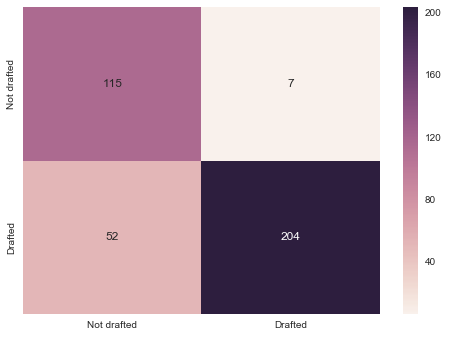

In [70]:
# display the number of individuals that were drafted out of the selected sample
num_drafted = df_linemen.loc[df_linemen["drafted"]== 1, "drafted"].size
total_samples = df_linemen["fortyyd"].size
print num_drafted, "linemen were drafted out of {} ({:.2f}%)".format(total_samples, (num_drafted/total_samples)*100)

df_linemen = master_dataframe.loc[(master_dataframe['year'] != 2015) & (master_dataframe["position"].isin(['OC', 'OG', 'OT', 'DE', 'DT', 'NT']))]
df_linemen = df_linemen.loc[(df_linemen["fortyyd"] >= 1) & (df_linemen["vertical"] >= 1) & (df_linemen["broad"] >= 1)]

X = df_linemen[["bmi", "fortyyd", "vertical", "size_speed", "power5"]].values
y = df_linemen["drafted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
N = y_test.size

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

lr = LogisticRegression(C=.1, random_state = 0, penalty='l2', tol=0.01)  # linear model # , 
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)

print ("\nLOGISTIC REGRESSION")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % lr.score(X_train_std, y_train))
print("test set score: %f" % lr.score(X_test_std, y_test))

# CONFUSION MATRIX
plt.ylabel("Real value")
plt.xlabel("Predicted value")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not drafted', 'Drafted'], yticklabels=['Not drafted', 'Drafted'])

import conf_mat_derivations
print "\nPositive case: undrafted"
cm_derivations = conf_mat_derivations.ConfMatDerivations(cm)
cm_derivations.summary()

print "ROC: {}".format(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))

Above are the results for Logistic Regression. There was a significant improvement in accuracy to 84%, missing on only 59 out of 378 (the number of test samples was slightly reduced when I filtered for "vertical" - reduced from 382 to 378). Here, I printed out a confusion matrix and associated ratios in order to look at the predictions a little closer. Recall that a primary goal of this project was to predict who will **not** get drafted. Thus, I chose the positive case here to be "Not drafted" in the above calculations. With that in mind, this model was able to identy 115 out of the 122 undrafted linemen in the test set, producing a **Sensitivity** (Recall) of 94%. A very good result. Further, the model was able to identify 204 out of the 256 players who were ultimately drafted, a **Specificity** score of 80%. Moreover, **Precision** (when a model predicts "Not drafted" how often is it right) was 69% while the Negative Predictive Value (when a model predicts "Drafted" how often is it right) was 97%, reflecting how conservative the model is in predicting that a player gets drafted. The model more readily predicts that an athlete remains undrafted, but when it does predict "Drafted" it is correct a very high percentage of the time. That is a very good quality for the purposes of this project.

The related **F1 score** (.80), which is a weighted average of the sensitivity and precision, is also a measue of a model's accuracy. I mention it because it's a commonly reported measure. However its weakness here is that it doesn't take the accuracy of the negative case into account. For example, in this project, the two classes ("Not drafted", "Drafted") are imbalanced with 67% (**Prevalence**) of players belonging to the "Drafted" class. If I were to predict "Drafted" for all 378 players, my Precision would be .67 with a Sensitivity of 1.0 (100%) and my F1 score would also be .80, even though my accuracy (Specificity) in predicting the "Undrafted" class would be 0%. Thus, another performance measure would probably be more useful here. I've thus also included the area under the ROC curve (auc) measure, which is .869. The ROC/AUC measures the relationship between the true positive rate and the false positive rate. 


Below, SVM accuracy simlarly improved with the engineered features combination, jumping to 83% (missing 66 out of 378). The Sensitivity is superior to the above Logistic Regression model, reducing the false negatives for the "Not drafted" class to just 3 (.98). However, performance (Specificity) is reduced in predicting who gets drafted to .75. The model remains similarly conservative when predicting "Drafted", although the auc score (.825) is slightly below the above Logistic Regression. 


SUPPORT VECTOR MACHINE
Misclassified 66 out of 378
Accuracy: 0.83
training set score: 0.821591
test set score: 0.825397

Positive case: undrafted
Sensitivity:       0.98
Specificity:       0.75
Precision:         0.65
Neg Pred Val:      0.98
F1 score:          0.78
ROC: 0.864658043033


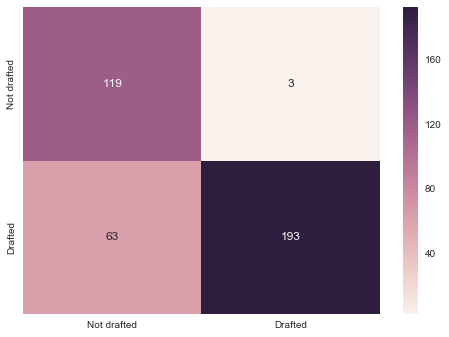

In [69]:

svm = SVC(kernel = 'linear', C=.01, random_state = 0)  # linear model  (has many parameters that need to be tuned)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("training set score: %f" % svm.score(X_train_std, y_train))
print("test set score: %f" % svm.score(X_test_std, y_test))

# CONFUSION MATRIX
plt.ylabel("Real value")
plt.xlabel("Predicted value")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not drafted', 'Drafted'], yticklabels=['Not drafted', 'Drafted'])

print "\nPositive case: undrafted"
cm_derivations = conf_mat_derivations.ConfMatDerivations(cm)
cm_derivations.summary()

print "ROC: {}".format(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))

## Feature Engineering + Feature Interaction

Finally, I considered using polynomial features (setting the degree equal to 3) with the engineered features combination. Logistic Regresson showed no improvement, but SVM showed a slight improvement in Specificity from .75 to .78 and reduced its errors from 66 to 61 out of 378, which was reflectd in the slightly improved accuracy of 84% (matching Logistic Regression) and slightly improved auc of .872 (besting all previous models). Nevertheless, due to the increased complexity (56 features) one of the above simpler models utilizing only 5 features is probably the better and more understandable choice. The above SVM might be the best choice given the project's goals. Even though its performance is slightly worse in identifying the "Drafted" class, it is the most accurate in predicting the "Not drafted" class, misclassifying less than half as many as Logistic Regression.


SUPPORT VECTOR MACHINE
Misclassified 61 out of 378
Accuracy: 0.84
training set score: 0.839773
test set score: 0.838624

Positive case: undrafted
Sensitivity:       0.97
Specificity:       0.78
Precision:         0.67
Neg Pred Val:      0.98
F1 score:          0.79
ROC: 0.872278432377


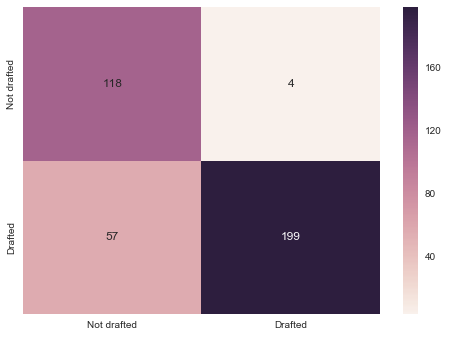

In [68]:

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

poly = PolynomialFeatures(degree=3).fit(X_train_std)
X_train_poly = poly.transform(X_train_std)
X_test_poly = poly.transform(X_test_std)

svm = SVC(kernel = 'linear', C = .01, random_state = 0)
svm.fit(X_train_poly, y_train)

y_pred = svm.predict(X_test_poly)

print ("\nSUPPORT VECTOR MACHINE")
print ("Misclassified {} out of {}".format( (y_test != y_pred).sum(), N))
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

print("training set score: %f" % svm.score(X_train_poly, y_train))
print("test set score: %f" % svm.score(X_test_poly, y_test))

# CONFUSION MATRIX
plt.ylabel("Real value")
plt.xlabel("Predicted value")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=['Not drafted', 'Drafted'], yticklabels=['Not drafted', 'Drafted'])

print "\nPositive case: undrafted"
cm_derivations = conf_mat_derivations.ConfMatDerivations(cm)
cm_derivations.summary()

print "ROC: {}".format(roc_auc_score(y_test, y_pred, average='macro', sample_weight=None))



## Next Steps

This was a very preliminary look at the data. Before I move forward to more fully evaluate each of the position groups, I believe that it would be extremely useful to fill in as much of the missing data as possible using sources like NFL.com. Due to some of the data being incomplete many samples were dropped. I also would like to add the most recent Combine/Draft data. This would significantly increase the size of the dataset and perhaps positively influence the performance of the models. Much more can be done with the data, and the models can be further refined. Moving forward, I would implement k-fold cross validation and apply additional model tuning. I would perhaps use Grid Search to more systematically identify the best combination of features. Perhaps even trying additional models would be insightful. It's important to see if the accuracy achieved in this preliminary project can be reproduced or even exceeded.

## Conclusion

The NFL Scouting Combine is sort of a final exam for both players and scouts, one last opportunity to influence decisions. Although so much work has already gone into evaluations prior to the Combines that perhaps many teams already have their minds made up regarding most players, it does appear that performances at the Combines are related to who gets drafted the following month. 

Each player at the Combine was invited by the committe based on the expectation that the player would be drafted, yet about one-third of participants go undrafted every year. The purpose of this project was not to evaluate in which round a player will get drafted (although Combine performance may have an influence on that) but rather whether a player will get drafted at all. This project identified models that showed high Sensitivity in predicting undrafted players. This information could be especially useful to underclassmen debating whether to declare for the draft at the expense of their remaining college eligibility.

It may be that the Combines are most useful in aiding teams to identify the hidden gems, the non-consensus players who may have attended a smaller school, be coming off of an injury, or who've had uneven performances throughout their college career. These are the players who are often selected in the later rounds when it may be unclear whom to select. These are the players who are on the borderline of going undrafted. Perhaps minds are more readily influenced among these groups of players as draft day approaches.






